In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('dataset/Data_Tanaman_Padi.csv')

In [68]:
class Neural_Network(object):
    def __init__(self):
        # inisisasi nilai input layer, bobot, dan output layer
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3

        #bobot
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 

    def forward(self, X):
        self.z = np.dot(X, self.W1) 
        self.z2 = self.sigmoid(self.z) 
        self.z3 = np.dot(self.z2, self.W2) 
        o = self.sigmoid(self.z3) 
        return o 

    def sigmoid(self, s):
        # fungsi aktivasi sigmoid
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        # fungsi derivatif sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        self.o_error = y - o 
        self.o_delta = self.o_error*self.sigmoidPrime(o) 

        self.z2_error = self.o_delta.dot(self.W2.T) 
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) 

        # update nilai bobot
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)
    def get_w(self):
        return f"Nilai bobot : {self.W1} \nNilai Bias : {self.W2}"

    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        return f"{self.W1,self.W2}"

In [51]:
def prediksi(provinsi):
    prov = df[df['Provinsi']==provinsi]
    X_train = prov[['Luas Panen','Kelembapan','Suhu rata-rata']].values
    y_train = prov.Produksi.values
    
    

In [53]:
X_train = prov[['Luas Panen','Kelembapan','Suhu rata-rata']].values
y_train = prov[['Produksi']].values
X_scaler = X_train/np.amax(X_train, axis=0) 
y_scaler = y_train/max(y_train)


In [63]:
# X_pca = PCA(n_components=2).fit_transform(X)
# y_pca = y/max(y)
test = prov[['Luas Panen','Kelembapan','Suhu rata-rata','Produksi']].sample(1)
X_test = test.drop(columns=['Produksi']).values
y_test = test.Produksi.values
y_test = test.Produksi.values
X_test_scaler = X_test/np.amax(X_test,axis=0)
y_test_scaler = y_test/max(y_train)


In [47]:
X_train_scaler = X_train/np.amax(X_train,axis=0)
y_train_scaler = y_train/max(y_train)
X_test_scaler = X_train/np.amax(X_train,axis=0)

In [81]:
loss_ = []
NN = Neural_Network()

print("===== Hasil Backward Propagation =======")
for i in range(0,1000) : # trains the NN 1,000 times
    predicted = NN.forward(X_test_scaler)
    
    loss = np.mean(np.square(y_test_scaler - predicted))
    loss_.append(loss)
    bobot_bias = NN.get_w()
    
    # MSE
    
    print("MSE: \n" +str(loss)) 
    # Bobot dan Bias
    print(bobot_bias)
    print("\n")
    NN.train(X_scaler, y_scaler)
    print('iterasi ke -',i)
    


===== Hasil Backward Propagation =======
MSE: 
0.1089674555986697
Nilai bobot : [[ 0.05140861 -1.62160249 -0.52509233]
 [-1.73701682  0.09900075  0.50629413]
 [-0.46899781 -0.46557546 -0.12976641]] 
Nilai Bias : [[ 0.77011933]
 [-0.29747221]
 [-1.10619813]]


iterasi ke - 0
MSE: 
0.03602646144043415
Nilai bobot : [[ 0.16626412 -1.6789256  -0.90037229]
 [-1.60147376  0.03013141  0.06150991]
 [-0.32989288 -0.53589405 -0.5846962 ]] 
Nilai Bias : [[ 0.99559531]
 [ 0.01647102]
 [-0.23416621]]


iterasi ke - 1
MSE: 
0.02531330914017333
Nilai bobot : [[ 0.25722104 -1.67756096 -0.92820597]
 [-1.49386068  0.03178872  0.02811524]
 [-0.22113709 -0.53422631 -0.61834847]] 
Nilai Bias : [[ 1.13929048]
 [ 0.14808802]
 [-0.02639955]]


iterasi ke - 2
MSE: 
0.016723442863558324
Nilai bobot : [[ 0.34501716 -1.66879968 -0.93034963]
 [-1.38982866  0.04249823  0.02553073]
 [-0.117153   -0.52356311 -0.62092639]] 
Nilai Bias : [[1.26570397]
 [0.24215241]
 [0.11267969]]


iterasi ke - 3
MSE: 
0.01059517441440

<Axes: >

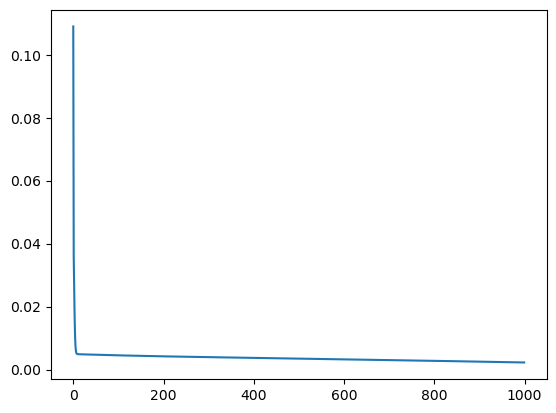

In [82]:
sns.lineplot(x=range(0,len(loss_)),y=loss_)

In [58]:
loss_

[0.05617846294583843,
 0.15772530438632826,
 0.09883351460438758,
 0.13466349634614255,
 0.1267470132562915,
 0.08504200858254854,
 0.14247328245896923,
 0.03663230103633445]

In [59]:
predicted = NN.forward(X_test)

/tmp/ipykernel_5439/3129577611.py:22: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


In [61]:
mean_absolute_error(predicted,y_test)

0.25101064547432117